<a href="https://colab.research.google.com/github/Nhat260501/final_project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img
from keras.utils import img_to_array
import matplotlib.pyplot as plt
from matplotlib.image import imread
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


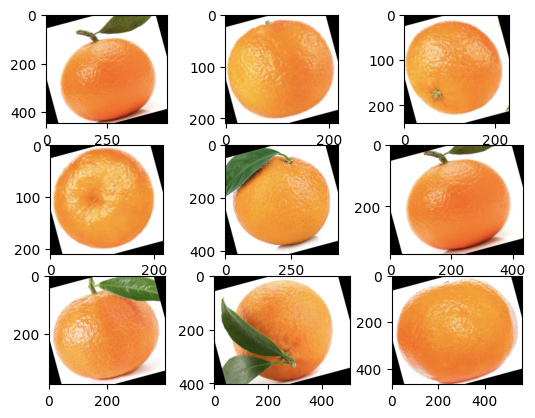

In [ ]:
folder= '/content/drive/MyDrive/fruit/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'freshorange'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()
photos, labels = list(), list()

In [ ]:
def plot_history(history_fine):
  f1 = history_fine.history['accuracy']

  loss = history_fine.history['loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [ ]:
for file in listdir(folder):
  if file.startswith('apple'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('banana'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('freshorange'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('rottenorange'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

In [ ]:
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

(409, 200, 200, 3) (409,)


In [ ]:
save('kindoforange_photos.npy', photos)
save('kindoforange_labels.npy', labels)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 128)     

In [ ]:
history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
13/13 [==============================] - 41s 3s/step - loss: 5444.4883 - accuracy: 0.2543
Epoch 2/50
13/13 [==============================] - 37s 3s/step - loss: 20.3458 - accuracy: 0.5306
Epoch 3/50
13/13 [==============================] - 45s 3s/step - loss: 1.5615 - accuracy: 0.5770
Epoch 4/50
13/13 [==============================] - 39s 3s/step - loss: 0.7597 - accuracy: 0.6797
Epoch 5/50
13/13 [==============================] - 39s 3s/step - loss: 0.6496 - accuracy: 0.7457
Epoch 6/50
13/13 [==============================] - 37s 3s/step - loss: 0.5705 - accuracy: 0.7897
Epoch 7/50
13/13 [==============================] - 39s 3s/step - loss: 0.5500 - accuracy: 0.7873
Epoch 8/50
13/13 [==============================] - 39s 3s/step - loss: 0.4444 - accuracy: 0.8264
Epoch 9/50
13/13 [==============================] - 38s 3s/step - loss: 0.3899 - accuracy: 0.8411
Epoch 10/50
13/13 [==============================] - 39s 3s/step - loss: 0.3142 - accuracy: 0.8826
Epoch 11/50
13/

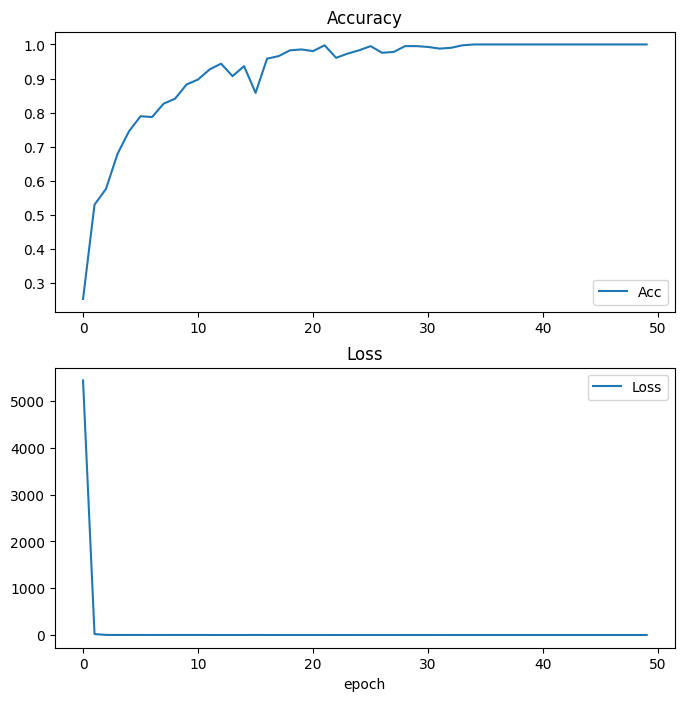

In [ ]:
plot_history(history)

In [ ]:
model.evaluate(photos,labels)


13/13 [==============================] - 12s 902ms/step - loss: 0.0017 - accuracy: 1.0000


[0.0017175284447148442, 1.0]

In [ ]:
model.save('Kindoforange_Final.h5')

In [ ]:
from keras.models import load_model
models=load_model('Kindoforange_Final.h5')

In [ ]:
classes = ["Tao","Chuoi","Cam tuoi", "Cam hu"]

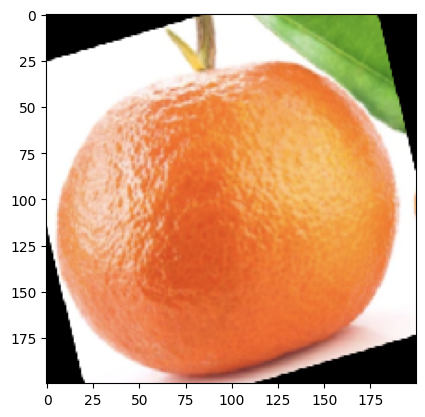

In [ ]:
test1 = load_img('/content/drive/MyDrive/test_fruit/test_1.jpg', target_size=(200,200))
plt.imshow(test1)


In [ ]:
import numpy as np
imgRe = img_to_array(test1)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 75ms/step
[[0.11239769 0.11281867 0.13111529 0.12767436 0.09123384 0.09719446
  0.0835993  0.08317019 0.08433729 0.07645886]]


'Cam tuoi'

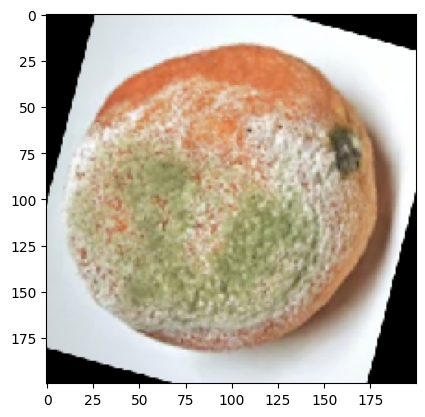

In [ ]:
test2 = load_img('/content/drive/MyDrive/test_fruit/test_2.jpg', target_size=(200,200))
plt.imshow(test2)

In [ ]:
import numpy as np
imgRe = img_to_array(test2)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 45ms/step
[[0.08374052 0.12075861 0.11304531 0.2043563  0.08641017 0.08160161
  0.10111959 0.08349033 0.05653359 0.06894396]]


'Cam hu'

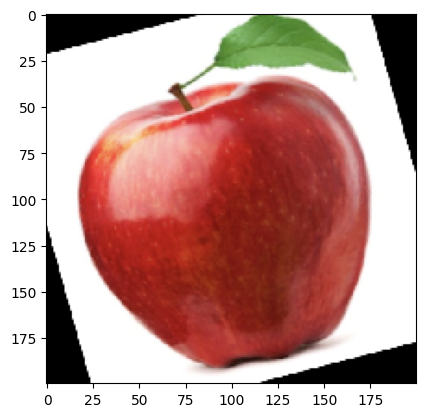

In [157]:
test3 = load_img('/content/drive/MyDrive/fruit/apple1.jpg', target_size=(200,200))
plt.imshow(test3)

In [158]:
import numpy as np
imgRe = img_to_array(test3)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 122ms/step
[[0.13478343 0.10219941 0.12444454 0.11493614 0.09140302 0.10294468
  0.08304404 0.08107255 0.08711118 0.07806105]]


'Tao'

In [1]:
pip install opencv-contrib-python==4.6.0.66

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [3]:
parameters = cv2.aruco.DetectorParameters_create()
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_5X5_50)

In [4]:
class HomogeneousBgDetector():
    

    def detect_objects(self, frame):
        # Convert Image to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Create a Mask with adaptive threshold
        mask = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 19, 5)

        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

     
        objects_contours = []

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 2000:
              objects_contours.append(cnt)
        return objects_contours

In [5]:
detector = HomogeneousBgDetector()